<H1> Importing and Exploring Provided Datasets </H1>

<H4> Import the necessary packages.</H4>

In [55]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

*Bring in the file names for easy access.*

In [30]:
zippedData = ['bom.movie_gross.csv.gz','imdb.name.basics.csv.gz','imdb.title.akas.csv.gz',
              'imdb.title.basics.csv.gz','imdb.title.crew.csv.gz',
              'imdb.title.principals.csv.gz','imdb.title.ratings.csv.gz',
              'rt.movie_info.tsv.gz','rt.reviews.tsv.gz','tmdb.movies.csv.gz',
              'tn.movie_budgets.csv.gz']

In [31]:
bom_movie_gross = pd.read_csv("zippedData/{}".format(zippedData[0]))
imdb_name = pd.read_csv("zippedData/{}".format(zippedData[1]))
imdb_title_aka = pd.read_csv("zippedData/{}".format(zippedData[2]))
imdb_title_basics = pd.read_csv("zippedData/{}".format(zippedData[3]))
imdb_title_crew = pd.read_csv("zippedData/{}".format(zippedData[4]))
imdb_title_principals = pd.read_csv("zippedData/{}".format(zippedData[5]))
imdb_title_rating = pd.read_csv("zippedData/{}".format(zippedData[6]))
rt_movie_info = pd.read_csv("zippedData/{}".format(zippedData[7]),sep='\t')
df8 = pd.read_csv("zippedData/{}".format(zippedData[8]),sep='\t',encoding='latin1')
tmdb_movies = pd.read_csv("zippedData/{}".format(zippedData[9]))
tn_movie_budget = pd.read_csv("zippedData/{}".format(zippedData[10]))

IMDB. In this section we combined a few imdb mini dataframes to make one joint one. Using this dataframe, we were able to explore which genres held the highest ratings in the last 20 years, and which directors has high ratings. 

First, we merged the data sets.

In [32]:
imdb=imdb_title_rating.merge(imdb_title_principals,on='tconst')
imdb=imdb.merge(imdb_title_basics,on='tconst')
imdb=imdb.merge(imdb_name,on='nconst')
imdb=imdb.merge(imdb_title_crew,on='tconst')
imdb.head()

,tconst,averagerating,numvotes,ordering,nconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,tt10356526,8.3,31,10,nm8994524,production_designer,NaN,NaN,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962",nm8353804,"nm3057599,nm4179342"
1,tt10356526,8.3,31,1,nm4718369,actor,NaN,"[""Sukh""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954",nm8353804,"nm3057599,nm4179342"
2,tt10356526,8.3,31,2,nm10007357,actress,NaN,"[""Raunak""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Roopi Gill,NaN,NaN,actress,"tt8749962,tt9260244,tt8785138",nm8353804,"nm3057599,nm4179342"
3,tt10356526,8.3,31,3,nm8743259,actress,NaN,"[""Jaanpreet""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Rubina Bajwa,NaN,NaN,actress,"tt8125398,tt7897324,tt10081104,tt6476532",nm8353804,"nm3057599,nm4179342"
4,tt10356526,8.3,31,4,nm3760302,actor,NaN,"[""Garry Randhawa""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Amrinder Gill,NaN,NaN,"actor,music_department,soundtrack","tt4846952,tt5569468,tt6882872,tt8749962",nm8353804,"nm3057599,nm4179342"


Next, we pulled the relevant columns, dropped duplicates and dropped mising values.

In [33]:
imdb=imdb[['original_title','genres','start_year','averagerating','category','primary_profession','primary_name']].where(imdb['start_year']>2000)
imdb=imdb.drop_duplicates('original_title')
imdb.dropna(inplace=True)
imdb['original_title'].unique()


array(['Laiye Je Yaarian', 'Bhajjo Veero Ve', 'Thug Life', ..., 'Heroes',
       'Postarica Ruza', 'Mad House: A Paranormal Documentary'],
      dtype=object)

For the first question, which genres have the highest rating, we pulled the two columns that we needed: average rating and genres. 

In [34]:
imdb_genre_rating=imdb[['genres','averagerating']]
imdb_genre_rating.head()

,genres,averagerating
0,Romance,8.3
10,"Comedy,Drama,Romance",8.3
20,Comedy,6.4
30,"Comedy,Romance",6.4
40,Comedy,6.9


Since the genre column sometimes contained more than one genre, we split this column so that each column only contained one genre.Then we renamed them and put them back together. This way we were able to anaylze which genres had the highest ratings. 

In [35]:
imdb_genre_rating[["One","Two","Three"]]=imdb_genre_rating.genres.str.split(pat=',', n=- 1, expand=True)
imdb_genre_rating
imdb_genre_rating_one=imdb_genre_rating[['One','averagerating']]
imdb_genre_rating_two=imdb_genre_rating[['Two','averagerating']]    
imdb_genre_rating_three=imdb_genre_rating[['Three','averagerating']]
imdb_genre_rating_one=imdb_genre_rating_one.rename(columns={"One":"Genre"})
imdb_genre_rating_two=imdb_genre_rating_two.rename(columns={"Two":"Genre"})
imdb_genre_rating_three=imdb_genre_rating_three.rename(columns={"Three":"Genre"})
genre_rating=pd.concat([imdb_genre_rating_three,imdb_genre_rating_two,imdb_genre_rating_one])
genre_rating['Genre'].unique()


C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([None, 'Romance', 'Drama', 'Fantasy', 'Horror', 'Family', 'Western',
       'Thriller', 'Crime', 'Mystery', 'History', 'Sci-Fi', 'Comedy',
       'War', 'Sport', 'Music', 'Documentary', 'News', 'Musical',
       'Animation', 'Biography', 'Reality-TV', 'Adventure', 'Adult',
       'Game-Show', 'Short', 'Action'], dtype=object)

In [36]:
genre_rating=genre_rating[genre_rating.Genre != 'Music']
genre_rating=genre_rating[genre_rating.Genre != 'Reality-TV']
genre_rating=genre_rating[genre_rating.Genre != 'News']
genre_rating=genre_rating[genre_rating.Genre != 'Game-Show']
genre_rating=genre_rating[genre_rating.Genre != 'Short']
genre_rating.dropna(inplace=True)
genre_rating['Genre'].unique()

array(['Romance', 'Drama', 'Fantasy', 'Horror', 'Family', 'Western',
       'Thriller', 'Crime', 'Mystery', 'History', 'Sci-Fi', 'Comedy',
       'War', 'Sport', 'Documentary', 'Musical', 'Animation', 'Biography',
       'Adventure', 'Adult', 'Action'], dtype=object)

In [83]:
genre_rating_mean=genre_rating.groupby(genre_rating['Genre']).mean().sort_values(by=['averagerating'],ascending=False).head(5)
#ax=sns.barplot(x="averagerating", y="Genre", data=genre_rating_mean)
#genre_rating_mean
#sns.boxplot(x="Genre", y="averagerating", data=genre_rating)

In [80]:
genre_rating=genre_rating[genre_rating.Genre != 'Horror']
genre_rating=genre_rating[genre_rating.Genre != 'Western']
genre_rating=genre_rating[genre_rating.Genre != 'Thriller']
genre_rating=genre_rating[genre_rating.Genre != 'Sci-Fi']
genre_rating=genre_rating[genre_rating.Genre != 'Adult']
genre_rating.sort_values(by=['averagerating'],ascending=False)
genre_rating.groupby(genre_rating['Genre']).agg(['mean'])
#ax1 = sns.barplot(x="averagerating", y="Genre", data=genre_rating)
#ax1.set_xlabel("User Rating")
#ax1.set_ylabel("Genres")
#ax1.set_title("Genres With the Highest Average User Rating ")
#ax1.sns.set_style("darkgrid")




,averagerating
,mean
Genre,
Action,5.807224
Adventure,6.169288
Animation,6.231209
Biography,7.142283
Comedy,5.989211
Crime,6.105897
Documentary,7.316969
Drama,6.396117


In [ ]:
genre_rating.groupby(genre_rating['Genre']).agg(['median'])
ax1 = sns.barplot(x="averagerating", y="Genre", data=genre_rating)
ax1.set_xlabel("User Rating")
ax1.set_ylabel("Genres")
ax1.set_title("Genres With the Highest Average User Rating ")

In [ ]:
#seaborn.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

In [ ]:
sns.barplot(x=)

Text(0.5, 1.0, 'Distribution of User Rating in Each Genre ')

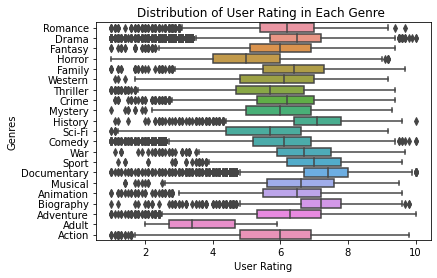

In [14]:
ax= sns.boxplot(x="averagerating",y="Genre",data=genre_rating)
ax.set_xlabel("User Rating")
ax.set_ylabel("Genres")
ax.set_title("Distribution of User Rating in Each Genre ")


KeyError: 'Genre'

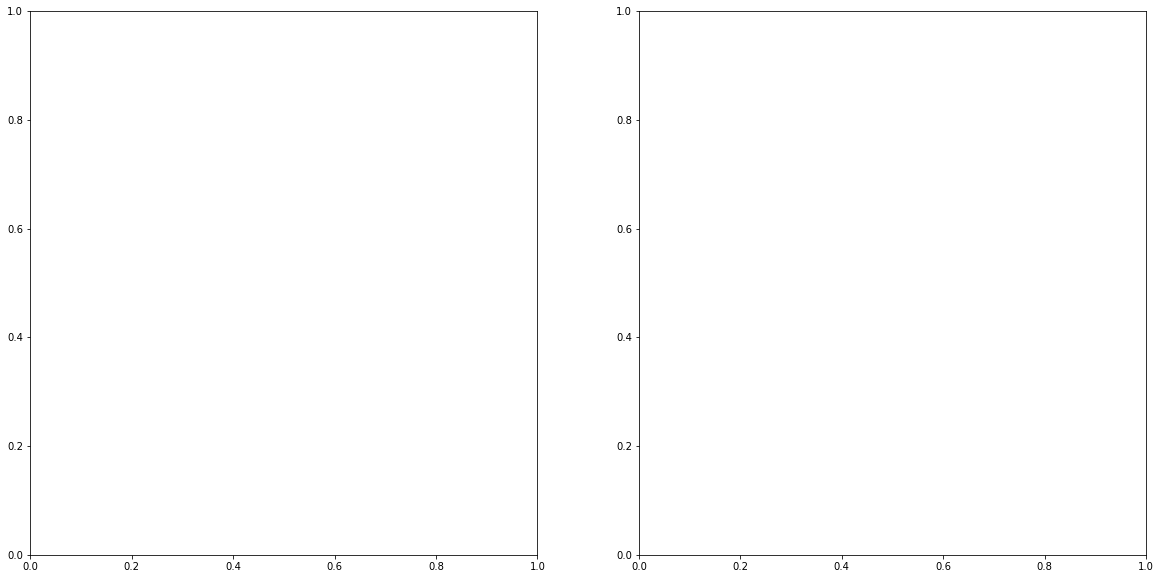

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.bar(
    x=genre_rating_mean["Genre"],
    height=genre_rating_mean["averagerating"],
    alpha=0.3,
    color='cyan'
)

ax1.set_xlabel("Genre")
ax1.set_ylabel("Mean User Rating")
ax1.set_title("Top 10 Genres With the Highest Mean Rating")

ax2.bar(
    x=genre_rating_median["Genre"],
    height=genre_rating_median["averageraring"],
    alpha=0.3,
    color='red'
)

ax2.set_xlabel("Genre")
ax2.set_ylabel("Median User Rating")
ax2.set_title("Top 10 Genres With the Highest Mean Rating");

In [ ]:
genre_rating_median=genre_rating.groupby('Genre').median().sort_values(by=['averagerating'],ascending=False).head(10)
genre_rating_median.plot.bar

In this section we looked at which directors had the highest ratings. 

In [ ]:
imdb_job=imdb[['primary_profession','primary_name','averagerating']]
imdb_job[['Director','Director2','Director3']]=imdb_job.primary_profession.str.split(pat=',', n=- 1, expand=True)
imdb_job_director=imdb_job[imdb_job['primary_profession'].str.contains('director')]
imdb_job_director_name=imdb_job_director[['averagerating','primary_name']]
imdb_job_director_name=imdb_job_director_name.groupby(['primary_name']).mean().sort_values('averagerating',ascending=False)
imdb_job_director_name.head(10).plot()
